In [3]:
import json

# Load the original JSON data
with open('allData_result.json', 'r') as file:
    data = json.load(file)

# Process each entry to replace composition with the element that has the highest value
for entry in data:
    composition = entry.get('composition')
    if composition:  # Ensure composition exists
        # Find the element with the highest value
        highest_element = max(composition, key=composition.get)
        highest_value = composition[highest_element]

        # Replace the 'composition' field with the element with the highest value
        entry['composition'] = {highest_element: highest_value}

# Save the modified data into a new JSON file
with open('modified_composition.json', 'w') as output_file:
    json.dump(data, output_file, indent=4)

print("New JSON file created with compositions replaced by their highest element.")


New JSON file created with compositions replaced by their highest element.


In [4]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the original JSON data
with open('modified_composition.json', 'r') as file:
    data = json.load(file)

# Prepare the feature matrix (X) and labels (y)
X = []
y = []

# Process the data to extract composition features and assign labels
for entry in data:
    composition = entry.get('composition', {})

    # If composition is not null, create a feature vector
    if composition:
        # Create a sorted list of elements, ensuring consistent order of features
        elements = ['Co', 'Cr', 'Fe', 'Ni', 'Mn', 'Ti', 'Zr', 'Hf', 'Nb', 'Ta', 'B', 'C', 'Si', 'Cu', 'Al']
        feature_vector = [composition.get(el, 0) for el in elements]  # Use 0 if the element is not present
        X.append(feature_vector)

        # Label can be the title or a numeric representation of it (e.g., 'paper-63' -> 63)
        label = entry.get('title')
        if label and 'paper-' in label:
            y.append(int(label.split('paper-')[-1]))

# Convert to numpy arrays for easier manipulation
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data (important for MLP)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Multilayer Perceptron Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       0.0
          25       0.00      0.00      0.00       0.0
          27       0.00      0.00      0.00       1.0
          63       0.00      0.00      0.00       1.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0

Accuracy: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set t

In [5]:
import json
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the original JSON data
with open('allData_result.json', 'r') as file:
    data = json.load(file)

# Prepare the feature matrix (X)
X = []
index_map = []  # To keep track of the indices that have valid compositions

# Process the data to extract composition features
for i, entry in enumerate(data):
    composition = entry.get('composition', {})

    if composition:  # Only process entries with composition data
        # Create a sorted list of elements, ensuring consistent order of features
        elements = ['Co', 'Cr', 'Fe', 'Ni', 'Mn', 'Ti', 'Zr', 'Hf', 'Nb', 'Ta', 'B', 'C', 'Si', 'Cu', 'Al']
        feature_vector = [composition.get(el, 0) for el in elements]  # Use 0 if the element is not present
        X.append(feature_vector)
        index_map.append(i)  # Track the original index of this entry

# Convert to numpy arrays for easier manipulation
X = np.array(X)

# Standardize the feature data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering to group similar compositions
n_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
labels = kmeans.labels_

# Append the cluster labels to the original data based on index_map
for i, idx in enumerate(index_map):
    data[idx]['cluster'] = int(labels[i])

# Save the data with cluster labels into a new JSON file
with open('composition_clusters.json', 'w') as output_file:
    json.dump(data, output_file, indent=4)

print(f"Clustering complete. Objects have been classified into {n_clusters} clusters.")


Clustering complete. Objects have been classified into 5 clusters.


Silhouette Score: 0.68


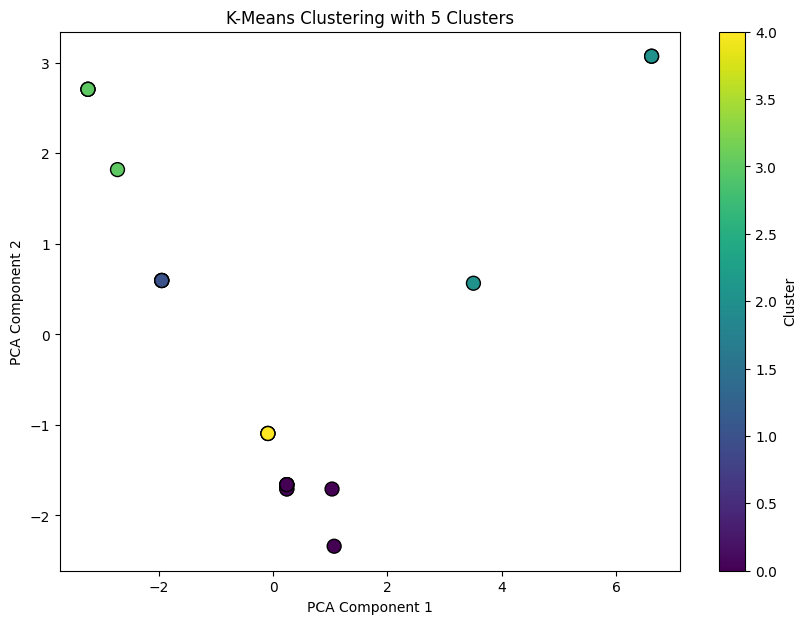

In [6]:
import json
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the original JSON data
with open('allData_result.json', 'r') as file:
    data = json.load(file)

# Prepare the feature matrix (X)
X = []
index_map = []  # To keep track of the indices that have valid compositions

# Process the data to extract composition features
for i, entry in enumerate(data):
    composition = entry.get('composition', {})

    if composition:  # Only process entries with composition data
        # Create a sorted list of elements, ensuring consistent order of features
        elements = ['Co', 'Cr', 'Fe', 'Ni', 'Mn', 'Ti', 'Zr', 'Hf', 'Nb', 'Ta', 'B', 'C', 'Si', 'Cu', 'Al']
        feature_vector = [composition.get(el, 0) for el in elements]  # Use 0 if the element is not present
        X.append(feature_vector)
        index_map.append(i)  # Track the original index of this entry

# Convert to numpy arrays for easier manipulation
X = np.array(X)

# Standardize the feature data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering to group similar compositions
n_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
labels = kmeans.labels_

# Append the cluster labels to the original data based on index_map
for i, idx in enumerate(index_map):
    data[idx]['cluster'] = int(labels[i])

# Save the data with cluster labels into a new JSON file
with open('composition_clusters.json', 'w') as output_file:
    json.dump(data, output_file, indent=4)

# Calculate the silhouette score as a measure of clustering quality
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Visualize the clusters using PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title(f'K-Means Clustering with {n_clusters} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
